In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score



In [2]:
df = pd.read_csv('data/heart-disease.csv')

In [13]:
column_data = ['age','sex']
select_column = df[column_data]
print(select_column)

     age  sex
0     63    1
1     37    1
2     41    0
3     56    1
4     57    0
..   ...  ...
298   57    0
299   45    1
300   68    1
301   57    1
302   57    0

[303 rows x 2 columns]


Text(0, 0.5, 'Số Lượng')

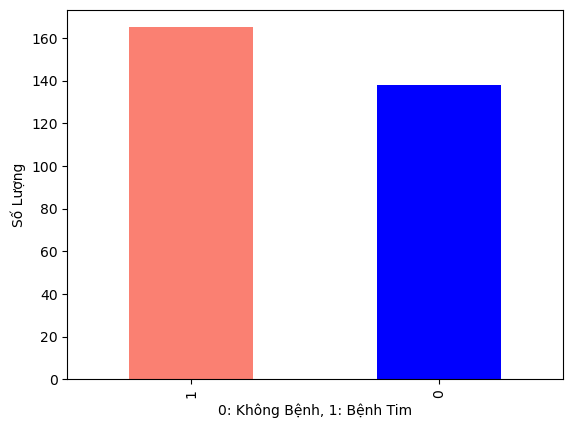

In [15]:
df['target'].value_counts().plot.bar(color=['salmon', 'blue'])

# Thiết lập nhãn cho biểu đồ
plt.xlabel('0: Không Bệnh, 1: Bệnh Tim')
plt.ylabel('Số Lượng')


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

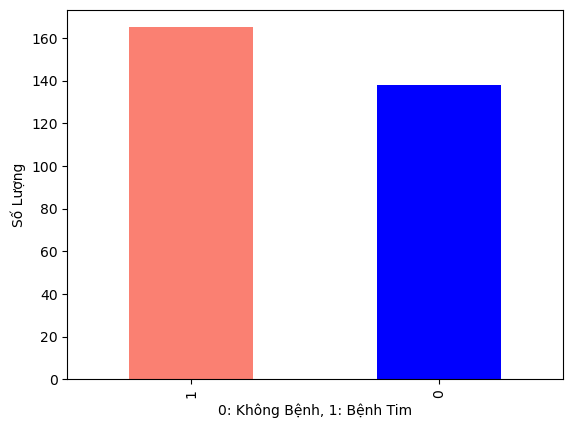

NameError: name 'fit_and_score' is not defined

In [21]:
#thử với hai mẫu 

df['target'].value_counts().plot.bar(color=['salmon', 'blue'])

# Thiết lập nhãn cho biểu đồ
plt.xlabel('0: Không Bệnh, 1: Bệnh Tim')
plt.ylabel('Số Lượng')

# Hiển thị biểu đồ
plt.show()
# split features and labels
X = df.drop('target', axis=1)
y = df['target']
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier(),
    'SVM': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

# Fit and score models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# Save models
for model_name, model in models.items():
    model.fit(X, y)  # Fit on the entire dataset before saving
    joblib.dump(model, f'{model_name}.joblib')
    print(f'{model_name} model saved.')

    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [29]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [30]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [31]:
72/(24+72), 93/(114+93)

(0.75, 0.4492753623188406)

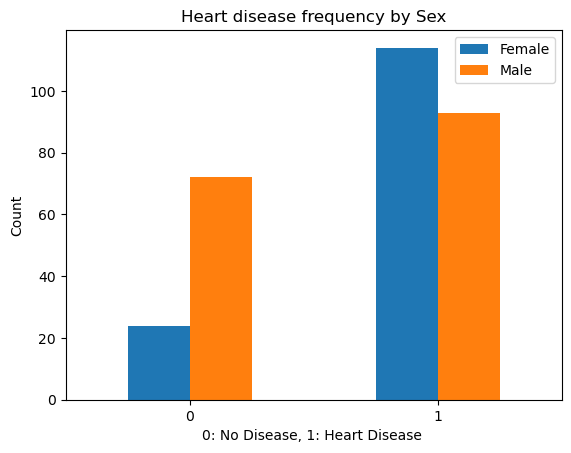

In [32]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar');
plt.title('Heart disease frequency by Sex')
plt.xlabel('0: No Disease, 1: Heart Disease ')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

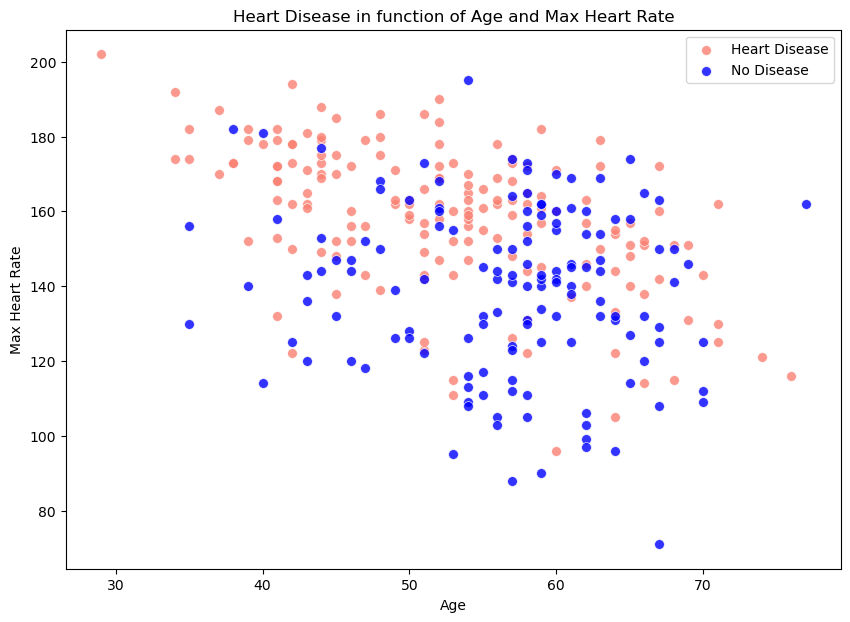

In [34]:
plt.figure(figsize=(10, 7))

# positive cases
sns.scatterplot(data=df, x=df.age[df.target==1], y=df.thalach[df.target==1], color='salmon', s=50, alpha=0.8);

# negative cases
sns.scatterplot(data=df, x=df.age[df.target==0], y=df.thalach[df.target==0], color='blue', s=50, alpha=0.8)

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');
plt.legend(['Heart Disease', 'No Disease']);

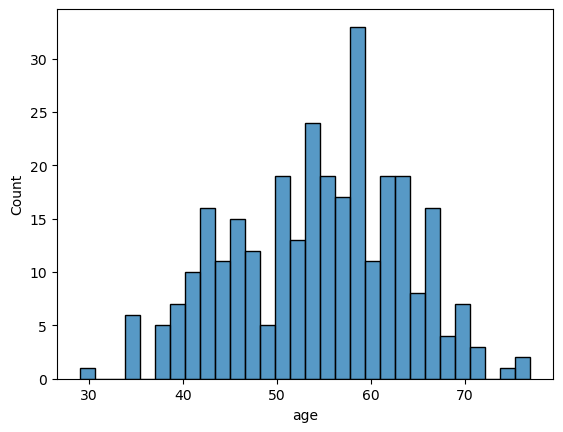

In [35]:
sns.histplot(data=df, x=df['age'], bins=30);

In [36]:
pd.crosstab(df['target'], df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


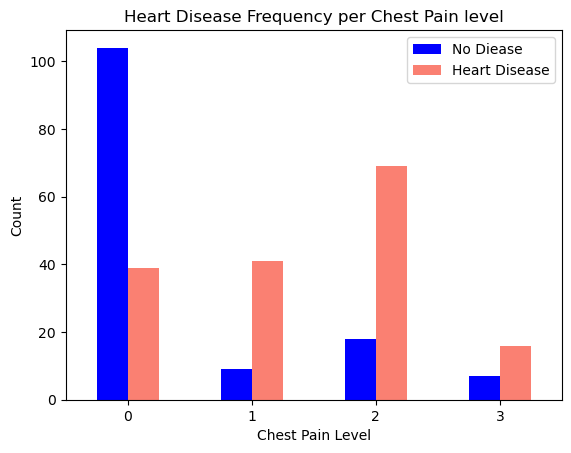

In [37]:
#hiển thị biểu đồ cột của bảng chéo đã tạo, thể hiện tần suất của bệnh tim theo mức độ đau ngực
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['blue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [38]:
df.corr()['target'][:-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

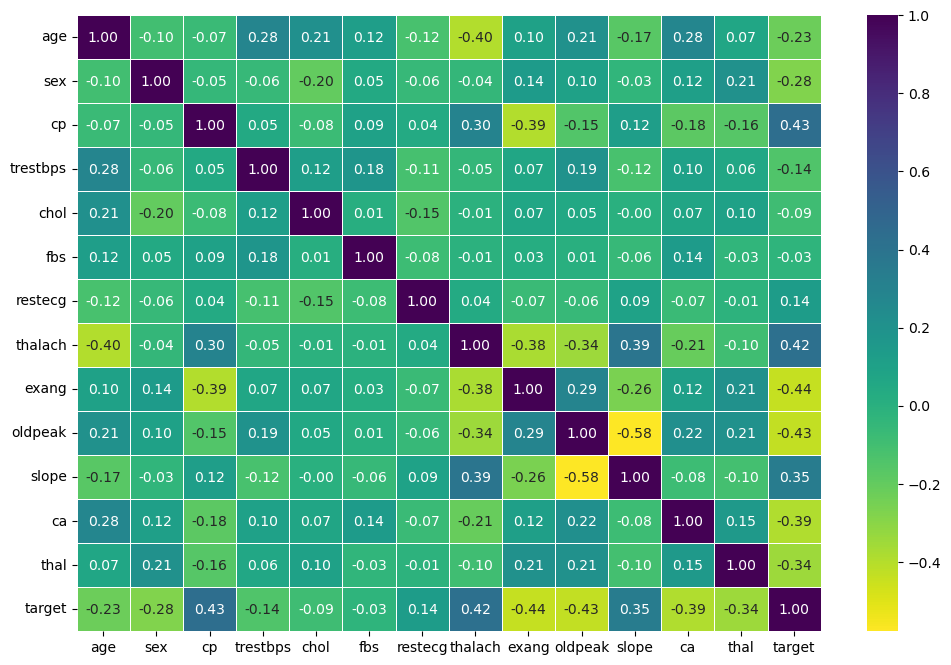

In [39]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

In [40]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [41]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [42]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... done

In [ ]:
from sklearn.externals import joblib  # Import joblib for model persistence

# ... (Rest of your code)

# Create models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier(),
    'SVM': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and score models
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# Save models
for model_name, model in models.items():
    model.fit(X, y)  # Fit on the entire dataset before saving
    joblib.dump(model, f'{model_name}.joblib')
    print(f'{model_name} model saved.')

    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [ ]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

In [ ]:
model_compare.T.plot(kind='bar');

In [ ]:
# create hyperparameter grid for số 1 Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

In [ ]:
# get best parameters
gs_log_reg.best_params_['C']


In [ ]:
# get the score
gs_log_reg.score(X_test, y_test)

In [ ]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, auc
# một biểu đồ ROC cùng với giá trị AUC, giúp đánh giá chất lượng của mô hình trong việc phân loại hai lớp.
# Assuming gs_log_reg is your Logistic Regression model
y_prob = gs_log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
confusion_matrix(y_test, y_preds)

In [ ]:
#from scikitplot.metrics import plot_confusion_matrix

# Assuming gs_log_reg is your Logistic Regression model
y_preds = gs_log_reg.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_preds, title='Confusion Matrix')
plt.show()


In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
# check current best parameter
gs_log_reg.best_params_['C']


In [ ]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_accuracy

In [ ]:
# mean of cross valided accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

In [ ]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision', cv=5)

cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall', cv=5)

cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross Validated F1
cv_f1 = cross_val_score(clf, X, y, scoring='f1', cv=5)

cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
from sklearn.metrics import roc_auc_score
cv_auc_roc = cross_val_score(clf, X, y, scoring='roc_auc', cv=5)
mean_auc_roc = np.mean(cv_auc_roc)
cv_auc_roc

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_accuracy,
                            'Precision': cv_precision,
                             'Recall': cv_recall,
                            'F1': cv_f1},
                              index=[0])

cv_metrics.T.plot.bar(legend=False);

plt.title('Cross Validated Classification Metrics')
plt.xticks(rotation=30);  

In [ ]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

In [ ]:
# check Coefficient of features
model.coef_

In [ ]:
df.head(2)

In [ ]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

In [ ]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False);

In [ ]:
X.head()

In [ ]:
X.columns

In [ ]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):    
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]

In [ ]:
predict_Heart_Disease(78, 1, 0, 100, 200, 0, 0, 150,0, 3, 2, 1 ,0 )

In [ ]:
predict_Heart_Disease(100, 1, 0, 100, 100, 0, 0, 150,0, 3, 2, 1 ,2 )